In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'numpy'

In [212]:
df= pd.read_csv('Admission_Prediction.csv') # reading the CSV file

In [213]:
df.sample(frac=1).head() # cheking the first five rows from the dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
315,316,308.0,104.0,NaN,2.5,3.0,8.07,0,0.65
441,442,332.0,112.0,1.0,1.5,3.0,8.66,1,0.79
133,134,323.0,112.0,5.0,4.0,4.5,8.78,0,0.79
187,188,335.0,118.0,5.0,4.5,3.5,9.44,1,0.93
227,228,312.0,110.0,2.0,3.5,3.0,8.53,0,0.64


In [214]:
df.info() # printing the summary of the dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [217]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.500000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,485.0,316.558763,11.274704,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,490.0,107.187755,6.112899,92.00,103.0000,107.00,112.00,120.00
University Rating,485.0,3.121649,1.146160,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.374000,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.484000,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.576440,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.560000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.721740,0.141140,0.34,0.6300,0.72,0.82,0.97


In [151]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [152]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)
#to replace the missing values in the 'GRE Score' column with the mode of the column
# Mode has been used here to replace the scores with the most occuring scores so that data follows the general trend


In [153]:
df['TOEFL Score'].fillna(df['TOEFL Score'].mode()[0],inplace=True)
#to replace the missing values in the 'GRE Score' column with the mode of the column
# Mode has been used here to replace the scores with the most occuring scores so that data follows the general trend

In [154]:
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)
#to replace the missing values in the 'University Rating' column with the mode of the column
# Mean has been used here to replace the scores with the average score

In [155]:
# dropping the 'Chance of Admit' and 'serial number' as they are not going to be used as features for prediction
X=df.drop(['Chance of Admit','Serial No.'],axis=1)

In [156]:
# 'Chance of Admit' is the target column which shows the probability of admission for a candidate
y=df['Chance of Admit']

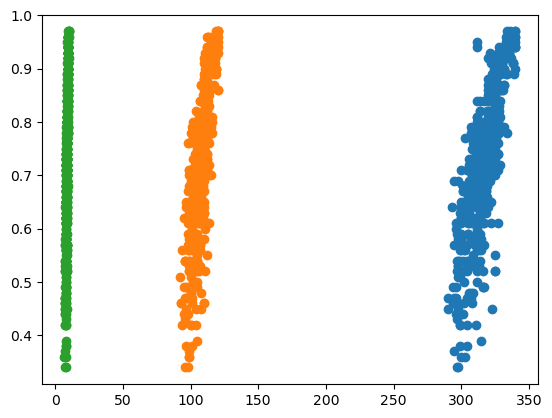

In [157]:
plt.scatter(df['GRE Score'],y) # Relationship between GRE Score and Chance of Admission
plt.scatter(df['TOEFL Score'],y) # Relationship between TOEFL Score and Chance of Admission
plt.scatter(df['CGPA'],y) # Relationship between CGPA and Chance of Admission

In [158]:
# splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=100)

In [194]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scaled_data=scalar.fit_transform(X_train)
scaled_test=scalar.transform(X_test)

In [196]:
# fitting the date to the Linear regression model
# from sklearn import linear_model
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(scaled_data,y_train)
# reg.fit(train_x, train_y)

In [198]:
# calucltaing the accuracy of the model
from sklearn.metrics import r2_score
y_pred=reg.predict(scaled_test)
score= r2_score(y_test,y_pred)

In [164]:
score

0.8259701213453234

In [165]:
scaled_data.shape,scaled_test.shape

((335, 7), (165, 7))

In [166]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((335, 7), (165, 7), (335,), (165,))

In [203]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.9)
ridge.fit(scaled_data,y_train)
y_pred=ridge.predict(scaled_test)

score=r2_score(y_test,y_pred)
print("R2 Score", score)

R2 Score 0.82632612648803


In [204]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [210]:
# prediction using the saved model.
loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(([[320,120,5,5,5,10,1]]))
print(prediction[0])

8.810773195994678
